In [84]:
import pandas as pd
import pandas_profiling
import numpy as np
import json
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1- Load excel datasets

In [2]:
#import and explore the excel data
df1 = pd.read_excel(open('Case_Recruitment_Dataset.xlsx','rb'), 'dataset 1')
df2 = pd.read_excel(open('Case_Recruitment_Dataset.xlsx','rb'), 'dataset 2')

In [7]:
df1.head(3)

,application_id,entered_on,exited_on,stage_name
0,0x00000A0957632650C26B6CE288D2DC27,2020-12-12 01:10:02,2021-01-12 04:05:52,Application Stage
1,0x000102EA1A28971B920C6E709C157862,2020-09-16 06:02:07,2020-11-23 08:19:10,Application Stage
2,0x0003956D92899154617462F79CA6F10B,2020-03-06 03:54:07,2020-03-24 15:04:29,Recruiter application


In [8]:
df2.head(3)

,application_id,candidate_id,applied_at,status,source_id,referrer_id,rejection_reason_type_id,rejection_reason_id,job_id,isDelete
0,0x03EF4F37DBE8D785526735B63DE9F606,0x3218CC29B17455BE7ECBE3F5DA1BBC5C,2020-01-27 04:16:00,active,13,1425169.0,NaN,NaN,310607,0
1,0x3E55D6230955FEAA97EA31B03B07BDD2,0x55775D8893D76C6631FA0B547816A7C8,2019-12-04 10:51:00,active,147809,1425169.0,NaN,NaN,310607,0
2,0x3B5BAEE1EEFAD8F64A3BE7400A10EB90,0x8BC85FD7B315189F61DA27EB67BB3DC6,2020-01-15 03:04:00,active,27,1425169.0,NaN,NaN,310607,0


In [9]:
#do we have the same data? 
df1[df1['application_id'] == '0x03EF4F37DBE8D785526735B63DE9F606']

,application_id,entered_on,exited_on,stage_name
304,0x03EF4F37DBE8D785526735B63DE9F606,2020-01-27 04:16:36,NaT,Recruiter application


In [10]:
df2[df2['application_id'] == '0x03EF4F37DBE8D785526735B63DE9F606']

,application_id,candidate_id,applied_at,status,source_id,referrer_id,rejection_reason_type_id,rejection_reason_id,job_id,isDelete
0,0x03EF4F37DBE8D785526735B63DE9F606,0x3218CC29B17455BE7ECBE3F5DA1BBC5C,2020-01-27 04:16:00,active,13,1425169.0,NaN,NaN,310607,0


In [11]:
#unique application_id across both datasets?
df1.application_id.nunique(), df2.application_id.nunique(), len(df1), len(df2)

(17318, 17318, 20697, 17318)

In [12]:
#are they the same?
not_common = [app_id for app_id in df1['application_id'].unique() if app_id not in df2['application_id'].unique()]
not_common

[]

In [13]:
#ok so let's merge the 2 db
df = pd.merge(df1, df2, on="application_id")
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.sample(3)

,application_id,entered_on,exited_on,stage_name,candidate_id,applied_at,status,source_id,referrer_id,rejection_reason_type_id,rejection_reason_id,job_id,isDelete
4269,0x3688CB0BD39918DAC18DE447D79AF09C,2020-12-02 05:28:10,NaT,Test:SHL,0xBF2732A2E3236A4954CACE873CD4BE59,2020-11-27 15:19:00,active,2,NaN,NaN,NaN,1472595,0
8213,0x688C18C852FA9F90F24F1E41F8034F19,2020-02-26 08:58:06,2020-02-26 08:58:07,Recruiter application,0xE80E6D7C3B99412595D5C1680B924CCC,2020-02-26 08:58:00,rejected,33,NaN,1.0,8359.0,1088126,0
3364,0x2B614535F4A5A2F997BEA984E3593C25,2020-08-11 18:30:56,2020-10-02 10:19:36,Test:SHL,0x974062749D0FFF5A806173C9C31CABA3,2020-08-10 06:19:00,rejected,2,NaN,1.0,9222.0,1219812,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20697 entries, 0 to 20696
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   application_id            20697 non-null  object        
 1   entered_on                20697 non-null  datetime64[ns]
 2   exited_on                 18317 non-null  datetime64[ns]
 3   stage_name                20697 non-null  object        
 4   candidate_id              20697 non-null  object        
 5   applied_at                20697 non-null  datetime64[ns]
 6   status                    20697 non-null  object        
 7   source_id                 20697 non-null  int64         
 8   referrer_id               2174 non-null   float64       
 9   rejection_reason_type_id  17700 non-null  float64       
 10  rejection_reason_id       17702 non-null  float64       
 11  job_id                    20697 non-null  int64         
 12  isDelete          

In [15]:
#reorder df to see clearer 
df = df[['application_id','candidate_id', 'stage_name','entered_on','exited_on',
        'status','rejection_reason_type_id','rejection_reason_id','job_id','applied_at', 
         'source_id', 'referrer_id', 'isDelete']]

In [16]:
df = df.sort_values(['application_id','candidate_id','applied_at','entered_on'])
df.head()

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
0,0x00000A0957632650C26B6CE288D2DC27,0xFAE0DFE79B43DC2C7C5B8F5244C89336,Application Stage,2020-12-12 01:10:02,2021-01-12 04:05:52,rejected,1.0,8358.0,1520993,2020-12-12 01:10:00,2,NaN,0
1,0x000102EA1A28971B920C6E709C157862,0x9A5F90D80572267A92ECEC39DF3EBCD2,Application Stage,2020-09-16 06:02:07,2020-11-23 08:19:10,rejected,1.0,29203.0,1219812,2020-09-16 06:02:00,2,NaN,0
2,0x0003956D92899154617462F79CA6F10B,0xDD174037AAB6E8A2F830F887C77CA551,Recruiter application,2020-03-06 03:54:07,2020-03-24 15:04:29,rejected,1.0,29203.0,1232995,2020-03-06 03:54:00,171201,NaN,0
3,0x00056C23816F8B28F7CF6D4121BFC017,0xC4869487F29544266CE09F432FC36CE4,Application Stage,2020-08-12 05:20:08,2020-08-21 10:21:13,rejected,1.0,29203.0,1219812,2020-08-12 05:20:00,171201,NaN,0
4,0x00067D38BC6FF4483A759CB9153D86AD,0x2810621482EB46B67E577EA03D257FA9,Application Stage,2020-12-15 05:05:02,2021-01-12 04:45:00,rejected,1.0,8358.0,1520993,2020-12-15 05:05:00,168017,NaN,0


### 2- Dataset exploration

In [17]:
#questions : 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20697 entries, 0 to 20696
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   application_id            20697 non-null  object        
 1   candidate_id              20697 non-null  object        
 2   stage_name                20697 non-null  object        
 3   entered_on                20697 non-null  datetime64[ns]
 4   exited_on                 18317 non-null  datetime64[ns]
 5   status                    20697 non-null  object        
 6   rejection_reason_type_id  17700 non-null  float64       
 7   rejection_reason_id       17702 non-null  float64       
 8   job_id                    20697 non-null  int64         
 9   applied_at                20697 non-null  datetime64[ns]
 10  source_id                 20697 non-null  int64         
 11  referrer_id               2174 non-null   float64       
 12  isDelete          

In [18]:
#pandas profiling
profile = df.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

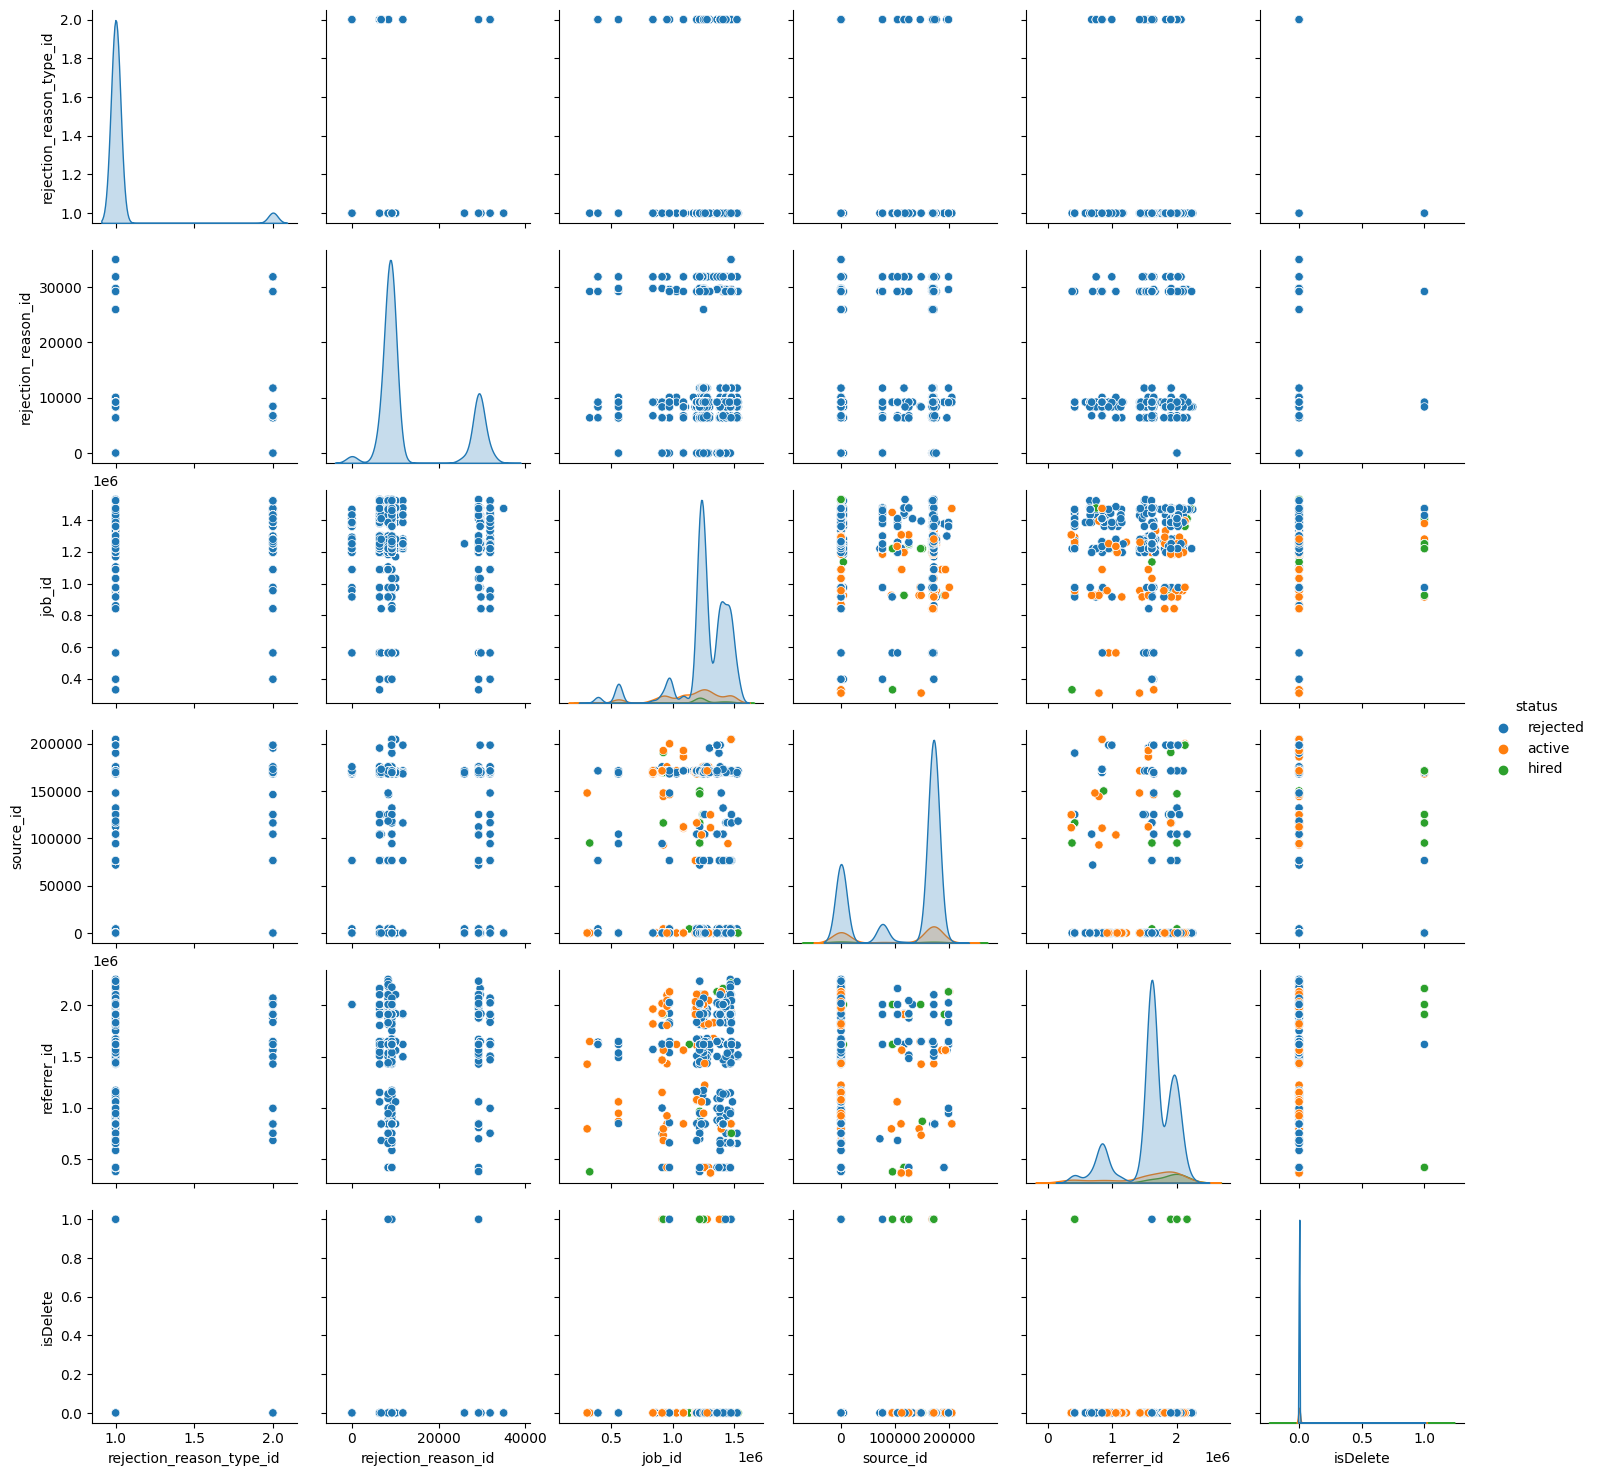

In [19]:
sns.pairplot(df, hue = 'status')
plt.show()

In [20]:
df.sample(3)

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
6091,0x4D151D4E047A0AE3A6F0F3351ED5DC4A,0x27ABE5D755F70156B8FA1A42AE5F5893,Application Stage,2020-12-07 06:26:01,2021-01-19 15:05:05,rejected,1.0,6390.0,1432072,2020-12-07 06:26:00,33,NaN,0
12585,0x9D58B1EC390F9F00BA46FA4AC05E3FAD,0xB0D2D702EA5C62084E31229EDA26D6D9,Recruiter Screening,2020-09-14 10:21:59,2020-09-15 03:35:05,rejected,1.0,9222.0,1219812,2020-09-10 02:02:00,76516,2006716.0,0
812,0x0A8BAB323BE19B9F479C5447FE8E0406,0x640AC64DFEA057B9B82DA2849007B3B3,Application Stage,2020-12-08 23:15:03,2020-12-23 02:22:04,rejected,1.0,6401.0,1472595,2020-12-08 23:15:00,2,NaN,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20697 entries, 0 to 20696
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   application_id            20697 non-null  object        
 1   candidate_id              20697 non-null  object        
 2   stage_name                20697 non-null  object        
 3   entered_on                20697 non-null  datetime64[ns]
 4   exited_on                 18317 non-null  datetime64[ns]
 5   status                    20697 non-null  object        
 6   rejection_reason_type_id  17700 non-null  float64       
 7   rejection_reason_id       17702 non-null  float64       
 8   job_id                    20697 non-null  int64         
 9   applied_at                20697 non-null  datetime64[ns]
 10  source_id                 20697 non-null  int64         
 11  referrer_id               2174 non-null   float64       
 12  isDelete          

### 3- High level stats

In [104]:
#current_year = datetime.now().year
    # How long have we got each cust
# Group by status and calculate the metrics
high_level = df.groupby('status').agg(
    total_candidates=('candidate_id', 'nunique'),
    sum_applications=('application_id', 'nunique'),
    path_length=('exited_on', lambda x: (x.max() - x.min())),
    stage_entry=('stage_name', lambda x: x.mode()[0]),
    stage_exit=('stage_name', lambda x: x.mode()[0])
)

# Calculate percentages across status
high_level['total_candidates_percentage'] = high_level['total_candidates'] / high_level['total_candidates'].sum() * 100
high_level['sum_applications_percentage'] = high_level['sum_applications'] / high_level['sum_applications'].sum() * 100

# Format the percentages
high_level['total_candidates_percentage'] = high_level['total_candidates_percentage'].round(2)
high_level['sum_applications_percentage'] = high_level['sum_applications_percentage'].round(2)

# Display the results
high_level
# customer_length['longevity'] = customer_length['created_at']['max'] - customer_length['created_at']['min']
# customer_length = customer_length.reset_index()
# customer_length.columns = ['name_o', 'orders_count', 'first_order', 'last_order', 'longevity']
# customer_length['last_order'] = pd.to_datetime(customer_length['last_order'], format='%Y-%m-%d')
# filtered_df = customer_length.loc[(customer_length['last_order'].dt.year == current_year)]
# sorted_df = filtered_df[['name_o', 'orders_count', 'last_order', 'longevity']].sort_values('last_order').head(10)
#     # Format the longevity column in years and months
# sorted_df['longevity'] = sorted_df['longevity'].apply(lambda x: f'{int(x.days/365)}y {int((x.days%365)/30)}m')
# sorted_df['last_order'] = pd.to_datetime(sorted_df['last_order'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')

# table = go.Figure(data=[go.Table(
#         columnwidth=1,
#         header=dict(values=list(sorted_df.columns),
#                     fill_color='lightgray',
#                     align=['left', 'center']),
#         cells=dict(values=[sorted_df.name_o, sorted_df.orders_count, sorted_df.last_order, sorted_df.longevity],
#                    fill_color='white',
#                    align=['left', 'center']))
#     ])


,total_candidates,sum_applications,path_length,stage_entry,stage_exit,total_candidates_percentage,sum_applications_percentage
status,,,,,,,
active,2145,2266,497 days 02:58:33,Recruiter application,Recruiter application,14.58,13.08
hired,90,91,589 days 19:43:07,Offer,Offer,0.61,0.53
rejected,12473,14961,1468 days 05:16:48,Application Stage,Application Stage,84.80,86.39


In [41]:
#applications per candidates
candidate_counts = df.groupby('candidate_id')['application_id'].nunique()

In [39]:
#multiple applications per candidate
candidates_with_multiple_applications = candidate_counts[candidate_counts > 1].index
num_candidates_with_multiple_applications = len(candidates_with_multiple_applications)
num_candidates_with_multiple_applications

1821

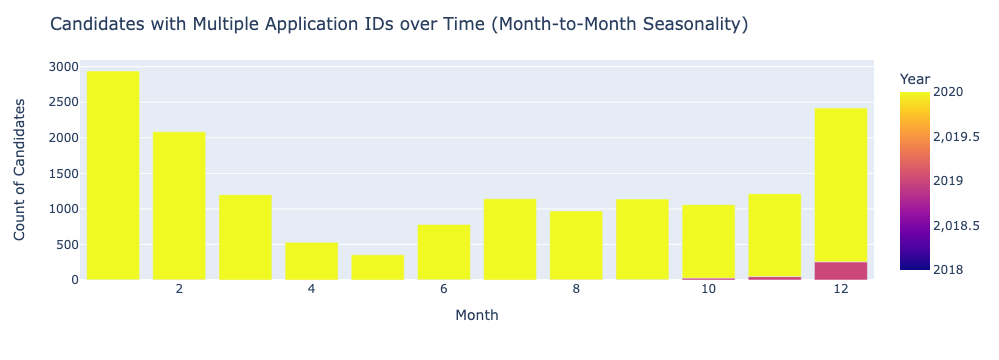

In [91]:
df['Month'] = df['applied_at'].dt.month
df['Year'] = df['applied_at'].dt.year

# Group by year and month, and calculate the count of candidates with multiple applications
grouped = df.groupby(['Year', 'Month'])['candidate_id'].nunique().reset_index()

# Rename columns
grouped.columns = ['Year', 'Month', 'Count']

# Plot the count of candidates with multiple applications month over month, with one color per year
fig = px.bar(grouped, x='Month', y='Count', color='Year', barmode='group', labels={'Count': 'Count of Candidates', 'Year': 'Year'})
fig.update_layout(title='Candidates with Multiple Application IDs over Time (Month-to-Month Seasonality)',
                  xaxis=dict(title='Month'),
                  yaxis=dict(title='Count of Candidates'))
fig.show()

In [40]:
#unique application per candidate
candidates_with_unique_application = candidate_counts[candidate_counts == 1].index
num_candidates_with_unique_application = len(candidates_with_unique_application)
num_candidates_with_unique_application

12396

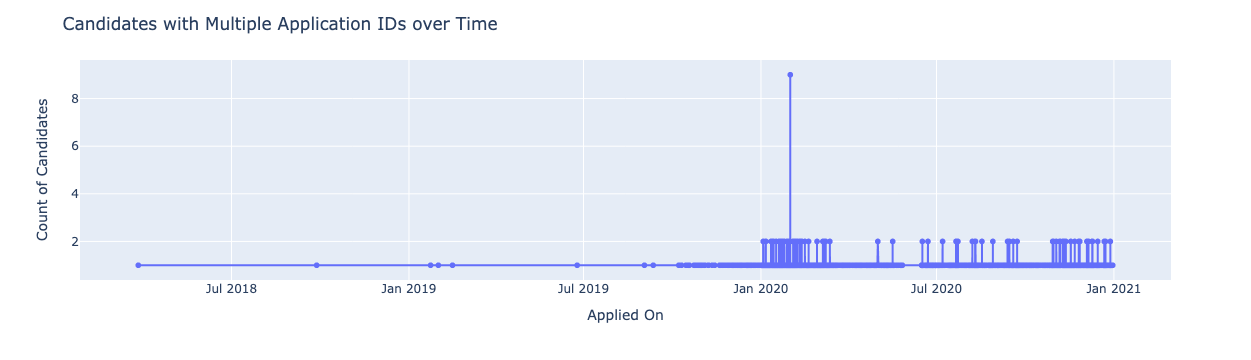

In [89]:
# Group by applied_on and calculate the count of candidates with multiple applications
grouped_multiple = df[df['candidate_id'].isin(candidates_with_multiple_applications)].groupby('applied_at')['candidate_id'].nunique()

# Reset index to access applied_at as a column
grouped_multiple = grouped.reset_index()

# Create a line plot with markers
fig = px.line(grouped_multiple, x='applied_at', y='candidate_id', markers=True)

# Customize the layout
fig.update_layout(
    title='Candidates with Multiple Application IDs over Time',
    xaxis=dict(title='Applied On'),
    yaxis=dict(title='Count of Candidates')
)

# Show the plot
fig.show()

In [105]:
# # Filter the dataframe for candidates with multiple applications
# candidates_with_multiple_applications = df['candidate_id'].value_counts()[df['candidate_id'].value_counts() > 1].index
# df_multiple = df[df['candidate_id'].isin(candidates_with_multiple_applications)]

# # Group by applied_at and calculate the count of unique application IDs
# grouped_multiple = df_multiple.groupby('applied_at')['candidate_id'].nunique()

# # Calculate the count of candidates with unique application IDs
# candidates_with_unique_application = df['candidate_id'].value_counts()[df['candidate_id'].value_counts() == 1].index
# df_unique = df[df['candidate_id'].isin(candidates_with_unique_application)]
# grouped_unique = df_unique.groupby('applied_at')['candidate_id'].nunique()

# # Create a date range for all unique applied_at values
# date_range = pd.date_range(df['applied_at'].min(), df['applied_at'].max(), freq='D')

# # Create a new DataFrame with the date range
# data = pd.DataFrame({'Applied At': date_range})

# # Merge the grouped data for candidates with multiple applications
# data = data.merge(pd.DataFrame({'Applied At': grouped_multiple.index, 'Candidates with Multiple Applications': grouped_multiple.values}),
#                   on='Applied At', how='left')

# # Merge the grouped data for candidates with unique application
# data = data.merge(pd.DataFrame({'Applied At': grouped_unique.index, 'Candidates with Unique Application': grouped_unique.values}),
#                   on='Applied At', how='left')

# # Forward fill missing values
# data.fillna(method='ffill', inplace=True)

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=data, x='Applied At', y='Candidates with Multiple Applications', label='Candidates with Multiple Applications')
# sns.lineplot(data=data, x='Applied At', y='Candidates with Unique Application', label='Candidates with Unique Application')
# plt.xlabel('Applied At')
# plt.ylabel('Count of Candidates')
# plt.title('Comparison of Applications Over Time')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

### 4- Application stages exploration

In [30]:
#find the stages from the candidates who have duplicated application id
stages = df[df.duplicated(subset='application_id', keep = False)].sort_values(['candidate_id','application_id','entered_on','exited_on'])
stages.head()

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
5150,0x4132ED779FF34EBF30A70964BE5E7796,0x0036310741ECE5A158BD821BACBE6939,Application Stage,2020-08-25 02:21:12,2020-09-11 03:39:54,rejected,1.0,9222.0,1384807,2020-08-25 02:21:00,171189,NaN,0
5149,0x4132ED779FF34EBF30A70964BE5E7796,0x0036310741ECE5A158BD821BACBE6939,Screened,2020-09-11 03:39:54,2020-12-04 02:58:20,rejected,1.0,9222.0,1384807,2020-08-25 02:21:00,171189,NaN,0
10716,0x867A9806F60E41CDF3254D8C480DB26B,0x00A1F4F3E0A44444C4A19918B73CE142,Application Review,2020-03-11 04:37:05,2020-03-11 07:33:18,rejected,1.0,6390.0,1270179,2020-03-11 04:37:00,171190,NaN,0
10717,0x867A9806F60E41CDF3254D8C480DB26B,0x00A1F4F3E0A44444C4A19918B73CE142,Recruiter Screening,2020-03-11 07:33:18,2020-03-13 06:05:29,rejected,1.0,6390.0,1270179,2020-03-11 04:37:00,171190,NaN,0
16956,0xD33365BC3430F82810146F1C63CE19BA,0x00B246BEA28B79370540BE4BAF205DC1,Recruiter application,2020-01-05 07:56:01,2020-01-13 08:23:43,rejected,1.0,29203.0,1249559,2020-01-05 07:56:00,171202,1617927.0,0


In [106]:
# 3- count of applicants by stage
stage_counts = stages['stage_name'].value_counts(normalize = True)
stage_counts

Application Stage                  0.206909
Test:SHL                           0.172177
Recruiter Screening                0.155832
Recruiter application              0.111070
Hiring Manager Review              0.094911
Screened                           0.088967
Interview 1 - Phone/Video          0.069651
Interview 1 - F2F                  0.022288
Interview 2 - Phone/Video          0.018016
Offer                              0.016530
Hired                              0.010958
Application Review                 0.009287
Interview 2 - F2F                  0.007615
Interview 3 - Phone/Video          0.006501
Test:Take Home                     0.003715
Face to Face – fly in candidate    0.003343
Interview 3 - F2F                  0.001857
Recruiter applicaton               0.000186
Interview 1 - F2F - delete         0.000186
Name: stage_name, dtype: float64

In [48]:
# NEXT STEP : clean data as spelling mistake made data illogical

In [57]:
#is the Interview 1 - F2F - delete worth keeping?
df[df['stage_name']=='Interview 1 - F2F - delete']

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
4038,0x33E0B0799F3D5A64D49E7A8DF91FB7AF,0xEA4C1E7C514876E3EC9E4675455664ED,Interview 1 - F2F - delete,2020-03-11 09:13:37,2020-07-17 10:39:04,rejected,1.0,29203.0,1219812,2020-02-17 13:44:00,13,379191.0,0


In [58]:
df[df['candidate_id']=='0xEA4C1E7C514876E3EC9E4675455664ED']

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
4039,0x33E0B0799F3D5A64D49E7A8DF91FB7AF,0xEA4C1E7C514876E3EC9E4675455664ED,Recruiter application,2020-02-17 13:44:17,2020-03-11 08:13:11,rejected,1.0,29203.0,1219812,2020-02-17 13:44:00,13,379191.0,0
4037,0x33E0B0799F3D5A64D49E7A8DF91FB7AF,0xEA4C1E7C514876E3EC9E4675455664ED,Recruiter Screening,2020-03-11 08:13:11,2020-03-11 09:13:37,rejected,1.0,29203.0,1219812,2020-02-17 13:44:00,13,379191.0,0
4038,0x33E0B0799F3D5A64D49E7A8DF91FB7AF,0xEA4C1E7C514876E3EC9E4675455664ED,Interview 1 - F2F - delete,2020-03-11 09:13:37,2020-07-17 10:39:04,rejected,1.0,29203.0,1219812,2020-02-17 13:44:00,13,379191.0,0


In [62]:
df['stage_name'] = df['stage_name'].replace({
    'Recruiter aplication': 'Recruiter application',
    'Recruiter applicaton': 'Recruiter application',
    'Recruiter applicaton': 'Recruiter application'
})
df['stage_name'] = df['stage_name'].replace({'Interview 1 - F2F - delete': 'Interview 1 - F2F'})
stage_counts = df['stage_name'].value_counts(normalize = True)
stage_counts

Recruiter application              0.416389
Application Stage                  0.373629
Test:SHL                           0.051843
Recruiter Screening                0.043968
Hiring Manager Review              0.026526
Screened                           0.023288
Interview 1 - Phone/Video          0.020051
Application Review                 0.019906
Interview 1 - F2F                  0.005991
Interview 2 - Phone/Video          0.004783
Offer                              0.004493
Hired                              0.002947
Interview 2 - F2F                  0.001981
Interview 3 - Phone/Video          0.001788
Face to Face – fly in candidate    0.000966
Test:Take Home                     0.000966
Interview 3 - F2F                  0.000483
Name: stage_name, dtype: float64

In [50]:
column_application_stage = df[df['stage_name']=='Application Stage']
column_application_stage['status'].value_counts()

rejected    7140
active       538
hired         55
Name: status, dtype: int64

### Let's try to recreate the path of the candidates that have the most duplicates in application_id, means he went the furthest

In [63]:
#identify stage_names within application per candidate depending on date entered_on
duplicate_counts = df.groupby('candidate_id')['application_id'].value_counts()
candidates_with_more_than_three_stages = duplicate_counts[duplicate_counts > 2].index.get_level_values('candidate_id').unique()
path_df = df[df['candidate_id'].isin(candidates_with_more_than_three_stages)]
path = path_df.sort_values(['candidate_id','application_id','entered_on'])
#path = df.sort_values(['candidate_id','application_id','entered_on'])
path.head(10)

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
6416,0x5127C9AC0AD570EFF6F18F1351B27480,0x0186F724EC1E419D1CA02B45D3FDAC63,Test:SHL,2020-01-13 15:10:35,2020-01-13 15:10:42,rejected,1.0,9159.0,1195925,2019-12-10 17:56:00,171201,NaN,0
6417,0x5127C9AC0AD570EFF6F18F1351B27480,0x0186F724EC1E419D1CA02B45D3FDAC63,Recruiter Screening,2020-01-13 15:10:42,2020-01-21 15:22:53,rejected,1.0,9159.0,1195925,2019-12-10 17:56:00,171201,NaN,0
6418,0x5127C9AC0AD570EFF6F18F1351B27480,0x0186F724EC1E419D1CA02B45D3FDAC63,Interview 1 - Phone/Video,2020-01-21 15:22:53,2020-02-11 15:44:49,rejected,1.0,9159.0,1195925,2019-12-10 17:56:00,171201,NaN,0
4150,0x351E58F8336FB028E7E472C6B750D307,0x01989C0AE7CCAD8352F8E1183473F753,Recruiter application,2020-05-03 20:43:05,2020-06-18 03:30:40,active,NaN,NaN,1243978,2020-05-03 20:43:00,169395,NaN,0
4148,0x351E58F8336FB028E7E472C6B750D307,0x01989C0AE7CCAD8352F8E1183473F753,Hiring Manager Review,2020-06-18 03:30:40,2020-06-22 07:24:34,active,NaN,NaN,1243978,2020-05-03 20:43:00,169395,NaN,0
4149,0x351E58F8336FB028E7E472C6B750D307,0x01989C0AE7CCAD8352F8E1183473F753,Recruiter Screening,2020-06-22 07:24:34,NaT,active,NaN,NaN,1243978,2020-05-03 20:43:00,169395,NaN,0
454,0x05EA10DE7FEEE6A04B502BC8B0EBBE93,0x02222C87B0384672773ADF2E563AEDCA,Recruiter application,2020-02-20 18:26:16,2020-02-20 18:26:16,rejected,1.0,8359.0,1088126,2020-02-20 18:26:00,33,NaN,0
3874,0x319CF6A0E3DA40D4EA543CB1CCADC018,0x02222C87B0384672773ADF2E563AEDCA,Application Stage,2020-12-01 07:41:01,2020-12-07 08:45:26,rejected,1.0,9222.0,1472595,2020-12-01 07:41:00,171201,NaN,0
3872,0x319CF6A0E3DA40D4EA543CB1CCADC018,0x02222C87B0384672773ADF2E563AEDCA,Screened,2020-12-07 08:45:26,2020-12-07 08:46:26,rejected,1.0,9222.0,1472595,2020-12-01 07:41:00,171201,NaN,0
3873,0x319CF6A0E3DA40D4EA543CB1CCADC018,0x02222C87B0384672773ADF2E563AEDCA,Test:SHL,2020-12-07 08:46:26,2021-02-17 15:45:47,rejected,1.0,9222.0,1472595,2020-12-01 07:41:00,171201,NaN,0


In [64]:
#what s this candidate path looked like
df[df['candidate_id']=='0x58E38E6EE17BF0549F3B3E2C1D20FEBC'].sort_values(['application_id','entered_on'])

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
70,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Recruiter application,2020-01-15 00:26:04,2020-01-17 04:42:30,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
61,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Hiring Manager Review,2020-01-17 04:42:30,2020-01-17 11:53:06,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
62,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Recruiter Screening,2020-01-17 11:53:06,2020-01-20 15:01:26,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
63,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Interview 1 - Phone/Video,2020-01-20 15:01:26,2020-02-03 07:59:19,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
64,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Interview 2 - F2F,2020-02-03 07:59:19,2020-02-03 07:59:39,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
65,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Interview 1 - F2F,2020-02-03 07:59:39,2020-02-17 08:17:55,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
66,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Face to Face – fly in candidate,2020-02-17 08:17:55,2020-03-02 03:37:12,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
67,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Test:SHL,2020-03-02 03:37:12,2020-03-13 02:42:23,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
68,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Offer,2020-03-13 02:42:23,2020-03-20 03:33:26,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0
69,0x00B67C6E00A84E2F6DD18E7DA662D16B,0x58E38E6EE17BF0549F3B3E2C1D20FEBC,Hired,2020-03-20 03:33:26,NaT,hired,NaN,NaN,1249559,2020-01-15 00:26:00,171202,NaN,0


In [65]:
#path length
path_lengths = path.groupby(['candidate_id', 'application_id', 'status']).agg(
    path_length=('exited_on', lambda x: x.max() - x.min()),
    stage_entry=('stage_name', lambda x: x.iloc[0]),
    stage_exit=('stage_name', lambda x: x.iloc[-1]))
path_lengths.head()

path_length  \
candidate_id                       application_id                     status                      
0x0186F724EC1E419D1CA02B45D3FDAC63 0x5127C9AC0AD570EFF6F18F1351B27480 rejected 29 days 00:34:07   
0x01989C0AE7CCAD8352F8E1183473F753 0x351E58F8336FB028E7E472C6B750D307 active    4 days 03:53:54   
0x02222C87B0384672773ADF2E563AEDCA 0x05EA10DE7FEEE6A04B502BC8B0EBBE93 rejected  0 days 00:00:00   
                                   0x319CF6A0E3DA40D4EA543CB1CCADC018 rejected 72 days 07:00:21   
                                   0x478E73400609CC7B7812FC1C45903835 active                NaT   

                                                                                          stage_entry  \
candidate_id                       application_id                     status                            
0x0186F724EC1E419D1CA02B45D3FDAC63 0x5127C9AC0AD570EFF6F18F1351B27480 rejected               Test:SHL   
0x01989C0AE7CCAD8352F8E1183473F753 0x351E58F8336FB028E7E472C6B750D307 active    Recruiter application   
0x02222C87B0384672773ADF2E563AEDCA 0x05EA10DE7FEEE6A04B502BC8B0EBBE93 rejected  Recruiter application   
                                   0x319CF6A0E3DA40D4EA543CB1CCADC018 rejected      Application Stage   
                                   0x478E73400609CC7B7812FC1C45903835 active    Recruiter application   

                                                                                               stage_exit  
candidate_id                       application_id                     status                               
0x0186F724EC1E419D1CA02B45D3FDAC63 0x5127C9AC0AD570EFF6F18F1351B27480 rejected  Interview 1 - Phone/Video  
0x01989C0AE7CCAD8352F8E1183473F753 0x351E58F8336FB028E7E472C6B750D307 active          Recruiter Screening  
0x02222C87B0384672773ADF2E563AEDCA 0x05EA10DE7FEEE6A04B502BC8B0EBBE93 rejected      Recruiter application  
                                   0x319CF6A0E3DA40D4EA543CB1CCADC018 rejected                   Test:SHL  
                                   0x478E73400609CC7B7812FC1C45903835 active        Recruiter application

In [66]:
#now that we have a strong dataset with the candidates path, what kind of logic can we apply?
path_df = path_lengths.reset_index()
path_df.head()

,candidate_id,application_id,status,path_length,stage_entry,stage_exit
0,0x0186F724EC1E419D1CA02B45D3FDAC63,0x5127C9AC0AD570EFF6F18F1351B27480,rejected,29 days 00:34:07,Test:SHL,Interview 1 - Phone/Video
1,0x01989C0AE7CCAD8352F8E1183473F753,0x351E58F8336FB028E7E472C6B750D307,active,4 days 03:53:54,Recruiter application,Recruiter Screening
2,0x02222C87B0384672773ADF2E563AEDCA,0x05EA10DE7FEEE6A04B502BC8B0EBBE93,rejected,0 days 00:00:00,Recruiter application,Recruiter application
3,0x02222C87B0384672773ADF2E563AEDCA,0x319CF6A0E3DA40D4EA543CB1CCADC018,rejected,72 days 07:00:21,Application Stage,Test:SHL
4,0x02222C87B0384672773ADF2E563AEDCA,0x478E73400609CC7B7812FC1C45903835,active,NaT,Recruiter application,Recruiter application


In [67]:
#stats in stage_entry ?
path_df.stage_entry.value_counts()

Application Stage                  684
Recruiter application              313
Recruiter Screening                 41
Hiring Manager Review               23
Application Review                  17
Test:SHL                            15
Interview 1 - Phone/Video           14
Offer                                3
Screened                             2
Interview 2 - F2F                    2
Interview 1 - F2F                    1
Face to Face – fly in candidate      1
Interview 3 - Phone/Video            1
Interview 2 - Phone/Video            1
Name: stage_entry, dtype: int64

In [68]:
unconventional_stage_entry = path_df[~path_df['stage_entry'].isin(['Application Stage', 'Recruiter application'])]
unconventional_stage_entry.head(3)

,candidate_id,application_id,status,path_length,stage_entry,stage_exit
0,0x0186F724EC1E419D1CA02B45D3FDAC63,0x5127C9AC0AD570EFF6F18F1351B27480,rejected,29 days 00:34:07,Test:SHL,Interview 1 - Phone/Video
5,0x02AB50DC4586863021F97D082BA15681,0x91097AFF50A25947CC81922DDD613622,rejected,40 days 11:05:28,Recruiter Screening,Test:SHL
28,0x0763AE42DD696D7D8B1CD3064175F72F,0xD061A2FCB985025E2A213191748D384B,rejected,12 days 06:51:43,Hiring Manager Review,Interview 2 - Phone/Video


In [69]:
df[df['application_id']=='0xDF1B63D70CC3B76DC7155D127774CA9A']

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
17955,0xDF1B63D70CC3B76DC7155D127774CA9A,0x0E208C0A1CDD4D2D37AE73DD13465DC5,Interview 1 - Phone/Video,2020-08-21 07:02:31,2020-09-11 03:49:56,rejected,1.0,9222.0,1250495,2020-08-21 07:02:00,16,1617927.0,0
17956,0xDF1B63D70CC3B76DC7155D127774CA9A,0x0E208C0A1CDD4D2D37AE73DD13465DC5,Test:SHL,2020-09-11 03:49:56,2020-09-11 03:50:05,rejected,1.0,9222.0,1250495,2020-08-21 07:02:00,16,1617927.0,0
17957,0xDF1B63D70CC3B76DC7155D127774CA9A,0x0E208C0A1CDD4D2D37AE73DD13465DC5,Test:Take Home,2020-09-11 03:50:05,2020-09-28 08:33:49,rejected,1.0,9222.0,1250495,2020-08-21 07:02:00,16,1617927.0,0
17958,0xDF1B63D70CC3B76DC7155D127774CA9A,0x0E208C0A1CDD4D2D37AE73DD13465DC5,Interview 3 - Phone/Video,2020-09-28 08:33:49,2020-10-19 04:14:22,rejected,1.0,9222.0,1250495,2020-08-21 07:02:00,16,1617927.0,0


In [70]:
df[df['candidate_id']=='0x0E208C0A1CDD4D2D37AE73DD13465DC5']

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
17955,0xDF1B63D70CC3B76DC7155D127774CA9A,0x0E208C0A1CDD4D2D37AE73DD13465DC5,Interview 1 - Phone/Video,2020-08-21 07:02:31,2020-09-11 03:49:56,rejected,1.0,9222.0,1250495,2020-08-21 07:02:00,16,1617927.0,0
17956,0xDF1B63D70CC3B76DC7155D127774CA9A,0x0E208C0A1CDD4D2D37AE73DD13465DC5,Test:SHL,2020-09-11 03:49:56,2020-09-11 03:50:05,rejected,1.0,9222.0,1250495,2020-08-21 07:02:00,16,1617927.0,0
17957,0xDF1B63D70CC3B76DC7155D127774CA9A,0x0E208C0A1CDD4D2D37AE73DD13465DC5,Test:Take Home,2020-09-11 03:50:05,2020-09-28 08:33:49,rejected,1.0,9222.0,1250495,2020-08-21 07:02:00,16,1617927.0,0
17958,0xDF1B63D70CC3B76DC7155D127774CA9A,0x0E208C0A1CDD4D2D37AE73DD13465DC5,Interview 3 - Phone/Video,2020-09-28 08:33:49,2020-10-19 04:14:22,rejected,1.0,9222.0,1250495,2020-08-21 07:02:00,16,1617927.0,0


In [71]:
#do we have any stage_entry not being started by either Application Stage or Recruiter application that s successfull?
unconventional_entry_successful = unconventional_stage_entry[unconventional_stage_entry.status != 'rejected']
unconventional_entry_successful.stage_exit.value_counts()

Hired                              12
Interview 2 - Phone/Video           4
Face to Face – fly in candidate     3
Interview 1 - Phone/Video           3
Application Stage                   2
Offer                               2
Interview 2 - F2F                   1
Test:SHL                            1
Interview 3 - Phone/Video           1
Hiring Manager Review               1
Screened                            1
Name: stage_exit, dtype: int64

In [ ]:
#proportion of those unconventional entry path versus total hired ones
hired_total = df[df['status']!='rejected']
unconventional_entry_successful.application_id.nunique(), hired_total.application_id.nunique()

In [ ]:
#technically this is data cataloging hygiene, but for less than 1% it does not matter

In [ ]:
#average path length per application?
path_lengths = path_lengths.reset_index()
path_lengths['path_length'] = path_lengths['path_length'].dt.days
average_length_per_application = path_lengths.groupby('application_id')['path_length'].mean()
plt.figure(figsize=(8, 6))
plt.hist(average_length_per_application, bins=10, edgecolor='black')
plt.xlabel('Average Length per Application')
plt.ylabel('Frequency')
plt.title('Distribution of Average Length per Application')
plt.show()

In [ ]:
path_lengths.head()

In [ ]:
average_length_per_status = path_lengths.groupby(['status'])['path_length'].mean()
plt.figure(figsize=(8, 6))
plt.hist(average_length_per_status, bins=10, edgecolor='black')
plt.xlabel('Average Length per Application Status')
plt.ylabel('Frequency')
plt.title('Distribution of Average Length per Application Status')
plt.show()

In [ ]:
#when hired, what s the stage_entry and stage_exit?

In [ ]:
#identify sequence of stages
grouped_path = path.groupby('candidate_id')

# Iterate over each group to identify the different sequences
sequences = []
for candidate_id, group in grouped_path:
    group['sequence'] = (group['application_id'] != group['application_id'].shift()).cumsum()
    sequences.append(group)

# Concatenate the sequences back into a single DataFrame
path_sequences = pd.concat(sequences)
path_sequences.head()

In [ ]:
path.head()

In [ ]:
# Create the funnel chart using plotly
fig = go.Figure(go.Funnel(
    y=path['stage_name'],
    textposition='inside',
    textinfo='label+value',
    marker=dict(color='skyblue')
))

# Set the layout of the funnel chart
fig.update_layout(
    title='Recruitment Funnel',
    funnelmode='stack',
    hovermode='x',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(size=12)
)

# Display the funnel chart
fig.show()

### 5- People product

In [51]:
# How many candidates?
df.application_id.nunique(),df.candidate_id.nunique() 

(17318, 14217)

In [52]:
#discrepancy between candidates and application, did the candidate apply multiple times?
duplicates = df.duplicated(subset='candidate_id', keep=False)
duplicate_candidates = df[duplicates]
multiple_applications = duplicate_candidates.groupby('candidate_id').filter(lambda x: len(x['application_id'].unique()) > 1)
multiple_applications.head()

,application_id,candidate_id,stage_name,entered_on,exited_on,status,rejection_reason_type_id,rejection_reason_id,job_id,applied_at,source_id,referrer_id,isDelete
3,0x00056C23816F8B28F7CF6D4121BFC017,0xC4869487F29544266CE09F432FC36CE4,Application Stage,2020-08-12 05:20:08,2020-08-21 10:21:13,rejected,1.0,29203.0,1219812,2020-08-12 05:20:00,171201,NaN,0
4,0x00067D38BC6FF4483A759CB9153D86AD,0x2810621482EB46B67E577EA03D257FA9,Application Stage,2020-12-15 05:05:02,2021-01-12 04:45:00,rejected,1.0,8358.0,1520993,2020-12-15 05:05:00,168017,NaN,0
9,0x0014A3CAC48D2577642034972A3A1FFC,0x5AF903A3B5FFA6EB3C170DAF67AF1A59,Recruiter application,2020-02-18 08:52:07,NaT,active,NaN,NaN,1291981,2020-02-18 08:52:00,171201,NaN,0
16,0x0038FF5C99757E56B221DE8BEBA88B24,0xA3B28F6B0D4821E86D1A64D8FF524995,Application Stage,2020-07-07 15:44:02,2020-07-15 09:45:56,rejected,1.0,9222.0,1359927,2020-07-07 15:44:00,169401,NaN,0
18,0x0048E77663F6ECD3A7A2983F3D2303D7,0x07D78EC21F3DB218DF0C6FD14ED76F26,Application Stage,2020-09-04 14:38:04,2020-09-08 07:12:52,rejected,1.0,9222.0,1250495,2020-09-04 14:38:00,171201,NaN,0


In [53]:
#percentage of those multiple attempts that have been hired?
multiple_applications['status'].value_counts(normalize=True)

rejected    0.858013
active      0.119541
hired       0.022446
Name: status, dtype: float64

In [54]:
# versus applicants status percentage overall
status_counts = df['status'].value_counts(normalize = True)
status_counts

rejected    0.855293
active      0.127072
hired       0.017635
Name: status, dtype: float64

In [55]:
#how many times did candidate apply until hired?
active_applications = multiple_applications[multiple_applications['status'] == 'active']
average_applications = active_applications.groupby('candidate_id')['application_id'].count().mean()
average_applications

1.3603960396039605

In [56]:
#it seems to take more than 1 application for some candidates but this does not increase their chance higher
#let s look at rejected applications by job ID and source ID

### 6- Price of time 

In [ ]:
# 4- time duration for each stage 
df['duration'] = df['exited_on'] - df['entered_on']
stage_durations = df.groupby('stage_name')['duration'].mean()
stage_durations.sort_values()

In [ ]:
#SAME NEED RE-RUN AFTER CLEANING

In [ ]:
#get the status count per each stage
status_percentage = df.groupby('stage_name')['status'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

#graphit
plt.figure(figsize=(10, 6))
sns.barplot(x='stage_name', y='percentage', hue='status', data=status_percentage)
plt.xlabel('stage')
plt.ylabel('percentage of status')
plt.title('status proportion at each stage')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
#some of the stage do not have full options, it does not give good explanation

### X- Hired exploration

In [ ]:
# Group the DataFrame by source_id and calculate the percentage of hired candidates for each source_id
hired_candidates = df[df['status']=='hired']
percentage_hired_per_source = hired_candidates.groupby('source_id').size() / df.groupby('source_id').size() * 100

# Create a bar plot
sns.barplot(x=percentage_hired_per_source.index, y=percentage_hired_per_source.values)
plt.xlabel('Source ID')
plt.ylabel('Percentage Hired')
plt.title('Percentage of Hired Candidates per Source ID')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#proportion of rejected applications by job ID and source ID
rejected_applications = multiple_applications[multiple_applications['status'] == 'rejected']

In [ ]:
#proportion of rejected applications by job ID
rejected_applications.job_id.value_counts(normalize=True).head()

In [ ]:
# Group the DataFrame by job_id and calculate the percentage of hired candidates for each job_id
percentage_hired_per_job = hired_candidates.groupby('job_id').size() / df.groupby('job_id').size() * 100

# Create a bar plot
sns.barplot(x=percentage_hired_per_job.index, y=percentage_hired_per_job.values)
plt.xlabel('Job ID')
plt.ylabel('Percentage Hired')
plt.title('Percentage of Hired Candidates per Job ID')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#proportion of rejected applications by source ID
rejected_applications.source_id.value_counts(normalize=True).head()

In [ ]:
# 2- what sort of rejection? dig deeper
rejection_reason_counts = df['rejection_reason_id'].value_counts(normalize = True)
rejection_reason_counts.head()

In [ ]:
rejection_reason_counts.head(5).sum()

In [ ]:
len(rejection_reason_counts)

In [ ]:
# we could ignore the 30 rest of rejection reasons to focus on the top main 5, would be easier to know what they are

### 7- Place - distribution 

In [ ]:
# 5- anything to get from source?
source_counts = df['source_id'].value_counts()
len(source_counts)

In [ ]:
#is there any correlation between status and rejection_reason_type_id
corr = df['status'].astype('category').cat.codes.corr(df['rejection_reason_type_id'])
corr

In [ ]:
#what does isDelete mean?

### X- What is the candidate process step

In [ ]:
# 6- let's try to recreate the candidate process 
df_sorted = df.sort_values(['candidate_id', 'application_id','applied_at', 'entered_on', 'exited_on'])
df_sorted.head()

In [ ]:
# Create a dataframe with the recruitment stages and their respective counts
recruitment_funnel = df.groupby('stage_name').size().reset_index(name='count')

# Sort the stages in the order of the recruitment funnel
recruitment_funnel = recruitment_funnel.sort_values('count', ascending=False)

# Calculate the cumulative counts for the funnel chart
recruitment_funnel['cumulative_count'] = recruitment_funnel['count'].cumsum()

# Create the funnel chart using plotly
fig = go.Figure(go.Funnel(
    y=recruitment_funnel['stage_name'],
    x=recruitment_funnel['count'],
    textposition='inside',
    text=recruitment_funnel['count'],
    marker=dict(color='skyblue')
))

# Set the layout of the funnel chart
fig.update_layout(
    title='Recruitment Funnel',
    funnelmode='stack',
    hovermode='x',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(size=12)
)

# Display the funnel chart
fig.show()

In [ ]:
# Initialize the step column
df_sorted['step'] = 1

# Iterate over rows and update the step value
for index, row in df_sorted.iterrows():
    if index > 0:
        prev_row = df_sorted.loc[index - 1]
        if (
            row['candidate_id'] == prev_row['candidate_id'] and
            (row['entered_on'] != prev_row['entered_on'] or row['exited_on'] != prev_row['exited_on'])
        ):
            df_sorted.at[index, 'step'] = prev_row['step'] + 1

In [ ]:
# Group by candidate_id and aggregate the minimum values for each step
df_grouped = df_sorted.groupby('candidate_id').agg({'stage_name': 'first', 'step': 'min'})

# Sort the DataFrame by candidate_id and step
df_grouped = df_grouped.sort_values(['candidate_id', 'step'])

# Optionally, filter to exclude rows with the same stage_name as the previous step
df_filtered = df_grouped[df_grouped['stage_name'] != df_grouped['stage_name'].shift()]
df_filtered.head()

In [ ]:
stepped = df_filtered.reset_index()
stepped.stage_name.value_counts()

In [ ]:
#let's focus on finding the candidates that have multi records in dates to understand the process

In [ ]:
df.candidate_id.nunique(), df.application_id.nunique()

In [ ]:
# digging :  let's use teh andidate_id to identify further what stages are taken